# <span style="color:darkslategray">ABC LLC - Leads for Health Insurance Services </span>

### <span style="color:dimgray">Importing packages</span>

In [1]:
# Importing general packages
import pandas as pd
import dfply

from dfply import *
import numpy as np

# Importing packages for vizualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

### <span style="color:dimgray">Loading data</span>

<b>Features of df_bids:</b><br/>
● created: time of the bid<br />
● leadID: unique ID of lead<br />
● max_bid: bid offered by Abc LLC for that particular lead<br />
● won: 1 if their bid was the highest and they won the bid, 0 otherwise

In [2]:
# Reading Bids csv file
df_bids = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/bids_hw.csv', index_col=0)
df_bids.head(5)

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,created,leadID,max_bid,won
1,2017-12-22 16:08:21,4,22.0,1
2,2018-01-18 16:18:19,30,4.0,1
3,2018-01-22 16:08:57,120,5.0,1
4,2018-01-23 17:28:09,258,5.0,1
5,2018-01-23 18:16:10,266,6.0,1


<b>Features of df_leads:</b><br />
● leadID: unique ID of the lead<br />
● state_18: the state where the lead lives in<br />
● gender_18: lead's gender, which is 1 if male, and 2 if female<br />
● estimated_household_income_18: this is the lead's estimation of their own household income per year in dollars <br />
● cpa_status_18: 1 for closed leads, 0 for lost leads<br />
● premium_amount_18: value of the contract signed, to be paid monthly in dollars<br />

In [3]:
# Reading Leads csv file
df_leads = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/leads_hw.csv', index_col=0)
df_leads.head(5)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18
1,4,IL,1,37.00,45000,1.0,700
2,30,NY,2,43.35,65000,0.0,0
3,120,NY,1,32.96,90000,0.0,0
4,258,NY,1,34.82,65000,0.0,0
5,266,NY,2,40.35,65000,0.0,0


### <span style="color:dimgray"> Merging dataset </span>

In [87]:
df = df_leads >> left_join(df_bids, by = "leadID")
df.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1
1,30,NY,2,43.35,65000,0.0,0,2018-01-18 16:18:19,4.0,1
2,120,NY,1,32.96,90000,0.0,0,2018-01-22 16:08:57,5.0,1
3,258,NY,1,34.82,65000,0.0,0,2018-01-23 17:28:09,5.0,1
4,266,NY,2,40.35,65000,0.0,0,2018-01-23 18:16:10,6.0,1
5,348,NY,1,36.00,35000,0.0,0,2018-01-23 22:29:37,4.0,1
6,354,NY,1,36.69,35000,0.0,0,2018-01-23 22:30:47,4.0,1
7,360,MA,2,55.02,35000,0.0,0,2018-01-23 22:39:53,4.0,1
8,370,MA,1,57.89,90000,0.0,0,2018-01-23 22:44:28,4.0,1
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1


### <span style="color:dimgray"> Abc LLC's current most typical client </span>

#### <span style="color:darkgray"> Exploring the dataset </span>

In [5]:
# Checking the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360295 entries, 0 to 1360294
Data columns (total 10 columns):
leadID                           1360295 non-null int64
state_18                         1360295 non-null object
gender_18                        1360295 non-null int64
age_18                           1360295 non-null float64
estimated_household_income_18    1360295 non-null int64
cpa_status_18                    18788 non-null float64
premium_amount_18                1360295 non-null int64
created                          1360295 non-null object
max_bid                          1360295 non-null float64
won                              1360295 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 114.2+ MB


In [6]:
# Describing continuous variables
df.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,1.360295e+06,1.360295e+06,1.360295e+06,1.360295e+06,18788.000000,1.360295e+06,1.360295e+06,1.360295e+06
mean,7.436914e+06,1.497919e+00,4.566375e+01,6.066725e+04,0.026613,4.736417e+03,4.211519e+00,1.983687e-02
std,1.477931e+06,4.999959e-01,1.101899e+01,7.513724e+04,0.160953,5.523757e+06,1.824614e+00,1.394395e-01
min,4.000000e+00,1.000000e+00,1.000000e-01,2.000000e+04,0.000000,0.000000e+00,5.000000e-01,0.000000e+00
25%,6.412174e+06,1.000000e+00,3.600000e+01,4.000000e+04,0.000000,0.000000e+00,3.200000e+00,0.000000e+00
50%,7.475701e+06,1.000000e+00,4.600000e+01,5.000000e+04,0.000000,0.000000e+00,4.000000e+00,0.000000e+00
75%,8.578158e+06,2.000000e+00,5.500000e+01,6.500000e+04,0.000000,0.000000e+00,5.000000e+00,0.000000e+00
max,1.000259e+07,2.000000e+00,1.159400e+02,1.000000e+06,1.000000,6.442451e+09,3.000000e+01,1.000000e+00


#### <span style="color:darkgray"> Univariate analysis on closed leads </span>

In [180]:
df_closed = df >> mask(X.cpa_status_18 == 1)

In [181]:
df_closed.dtypes

leadID                             int64
state_18                          object
gender_18                          int64
age_18                           float64
estimated_household_income_18      int64
cpa_status_18                    float64
premium_amount_18                  int64
created                           object
max_bid                          float64
won                                int64
dtype: object

In [182]:
df_closed.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,5.000000e+02,500.000000,500.000000,500.000000,500.0,5.000000e+02,500.000000,500.0
mean,1.972253e+06,1.458000,44.640020,60412.302000,1.0,1.288585e+07,10.286160,1.0
std,2.439044e+06,0.498732,12.468135,45353.694216,0.0,2.881151e+08,4.792513,0.0
min,4.000000e+00,1.000000,22.820000,20000.000000,1.0,0.000000e+00,1.500000,1.0
25%,2.735450e+05,1.000000,32.245000,40000.000000,1.0,5.022500e+02,6.500000,1.0
50%,1.291555e+06,1.000000,46.120000,48000.000000,1.0,8.410000e+02,10.000000,1.0
75%,2.169809e+06,2.000000,56.460000,65500.000000,1.0,1.311750e+03,12.500000,1.0
max,9.956599e+06,2.000000,64.220000,750000.000000,1.0,6.442451e+09,28.000000,1.0


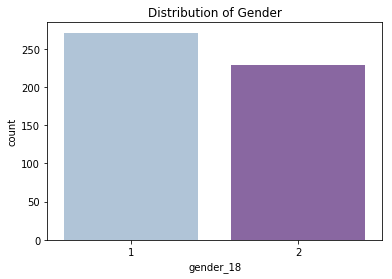

In [183]:
# Distribution of gender 
sns.countplot(x='gender_18', data=df_closed, palette="BuPu");
plt.title('Distribution of Gender');

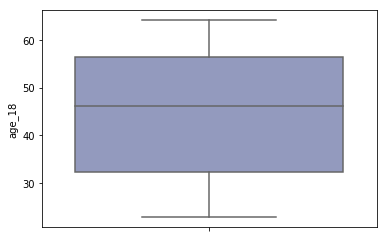

In [184]:
sns.boxplot(x="age_18", data=df_closed, orient="v", palette="BuPu")

Text(0.5, 0, 'Age')

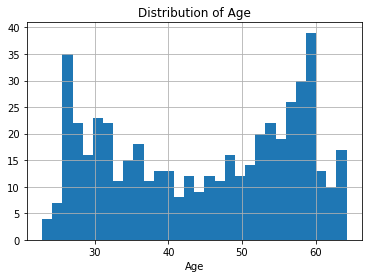

In [185]:
# Distribution of ages

df_closed.hist('age_18', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')

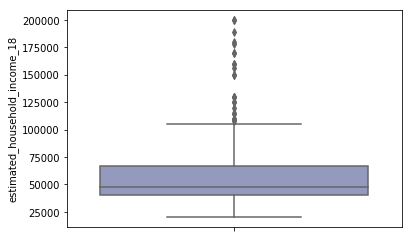

In [195]:
sns.boxplot(x="estimated_household_income_18", data=df_closed, orient="v", palette="BuPu")

In [188]:
#Excluding the outlier case 
df_closed = df_closed >> mask(X.estimated_household_income_18 < 250000)

Text(0.5, 0, 'HH Income')

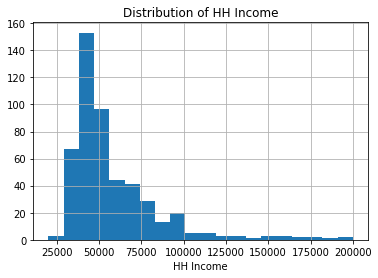

In [189]:
df_closed.hist('estimated_household_income_18', bins=20)
plt.title('Distribution of HH Income')
plt.xlabel('HH Income')

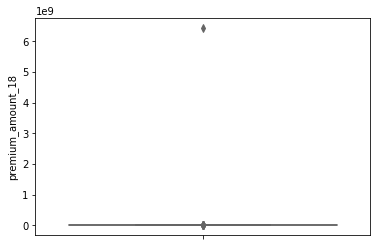

In [190]:
sns.boxplot(x="premium_amount_18", data=df_closed, orient="v", palette="BuPu")

In [191]:
#Excluding the outlier case 
df_closed = df_closed >> mask(X.premium_amount_18 < max(df_closed['premium_amount_18'])) 

Text(0.5, 0, 'Contract Value')

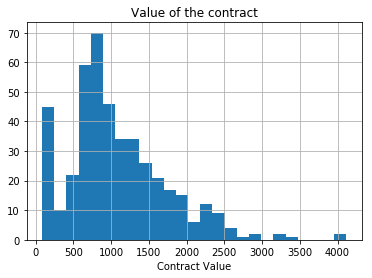

In [194]:
df_closed = df_closed >> mask(X.premium_amount_18 > 0) 

df_closed.hist(column='premium_amount_18', bins=25)
plt.title('Value of the contract')
plt.xlabel('Contract Value')


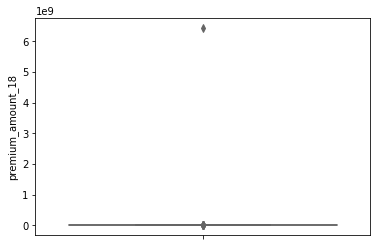

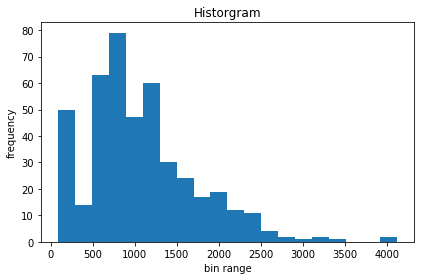

In [193]:
fig, ax = plt.subplots()

ax.hist(df_closed['premium_amount_18'], 20)
ax.set_title('Historgram')
ax.set_xlabel('bin range')
ax.set_ylabel('frequency')

fig.tight_layout()
plt.show()


In [10]:
df >> mask(X.cpa_status_18 == 1) >> group_by(X.gender_18, X.state_18) >> summarize(age = X.age_18.mean(), income = X.estimated_household_income_18.mean(), contr_size = X.premium_amount_18.mean())

,state_18,gender_18,age,income,contr_size
0,CA,1,56.460000,46001.000000,1.667000e+03
1,CT,1,42.443333,61667.000000,2.166333e+03
2,FL,1,62.405000,40400.000000,8.275000e+02
3,IL,1,54.250000,64250.000000,1.572750e+03
4,MA,1,44.400000,64125.897959,1.067531e+03
5,MI,1,56.000000,47001.000000,1.651000e+03
6,MN,1,58.500000,65159.000000,2.207000e+03
7,NC,1,32.000000,48000.000000,7.730000e+02
8,NJ,1,44.779130,63972.173913,8.340870e+02
9,NY,1,42.226311,55536.073770,8.811393e+02
